In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torchvision
import numpy as np

C:\Users\vinot\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\vinot\anaconda3\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
from utils import dataloader, plot_sample_data, train_transforms, test_transforms, trainer, evaluate_model
from models import Net

#### Dataloader

In [3]:
data_path = r"C:\Users\vinot\Python_files\Deep_learning_algorithims\Deep learning basics\School_AI\22nd_June_2023\data"
batch_size = 128

trainloader,testloader, classes = dataloader(data_path, batch_size, train_transforms,test_transforms)

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

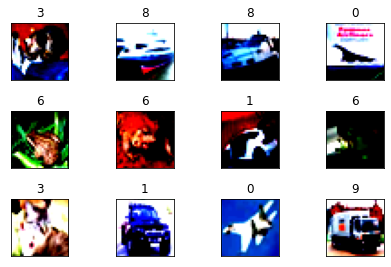

In [4]:
batch_data, batch_label = next(iter(testloader))
plot_sample_data(testloader)

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = Net(norm_type="batch_norm",norm_type_last=None).to(device)

In [6]:
# check model summary
from torchsummary import summary

summary(model, (3, 32, 32), batch_size = 32)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [32, 4, 32, 32]             108
              ReLU-2            [32, 4, 32, 32]               0
       BatchNorm2d-3            [32, 4, 32, 32]               8
           Dropout-4            [32, 4, 32, 32]               0
            Conv2d-5            [32, 8, 32, 32]             288
              ReLU-6            [32, 8, 32, 32]               0
       BatchNorm2d-7            [32, 8, 32, 32]              16
           Dropout-8            [32, 8, 32, 32]               0
            Conv2d-9           [32, 24, 32, 32]             288
             ReLU-10           [32, 24, 32, 32]               0
      BatchNorm2d-11           [32, 24, 32, 32]              48
          Dropout-12           [32, 24, 32, 32]               0
        MaxPool2d-13           [32, 36, 16, 16]               0
           Conv2d-14            [32, 4,

In [7]:
num_epochs = 20
optimizer = optim.Adam(model.parameters(), lr=0.005)  # large learning rate
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, epochs=num_epochs, steps_per_epoch=len(trainloader))

trainer = trainer(model, device, optimizer, scheduler)
for epoch in range(1, num_epochs + 1):
    print(f"Epoch {epoch}")
    trainer.train(trainloader)
    trainer.test(testloader)
    scheduler.step()

Epoch 1


Train: Loss=1.2560 Batch_id=390 Accuracy=37.52: 100%|████████████████████████████████| 391/391 [02:08<00:00,  3.05it/s]


Test set: Average loss: 1.4708, Accuracy: 4583/10000 (45.83%)

Epoch 2


Train: Loss=1.1903 Batch_id=390 Accuracy=54.02: 100%|████████████████████████████████| 391/391 [02:02<00:00,  3.19it/s]


Test set: Average loss: 1.1708, Accuracy: 5846/10000 (58.46%)

Epoch 3


Train: Loss=0.8778 Batch_id=390 Accuracy=59.49: 100%|████████████████████████████████| 391/391 [02:04<00:00,  3.15it/s]


Test set: Average loss: 1.1129, Accuracy: 6061/10000 (60.61%)

Epoch 4


Train: Loss=0.8981 Batch_id=390 Accuracy=62.96: 100%|████████████████████████████████| 391/391 [02:00<00:00,  3.24it/s]


Test set: Average loss: 1.0184, Accuracy: 6364/10000 (63.64%)

Epoch 5


Train: Loss=0.8596 Batch_id=390 Accuracy=65.39: 100%|████████████████████████████████| 391/391 [02:01<00:00,  3.22it/s]


Test set: Average loss: 1.0326, Accuracy: 6435/10000 (64.35%)

Epoch 6


Train: Loss=0.6698 Batch_id=390 Accuracy=66.85: 100%|████████████████████████████████| 391/391 [02:04<00:00,  3.15it/s]


Test set: Average loss: 0.9795, Accuracy: 6558/10000 (65.58%)

Epoch 7


Train: Loss=0.9308 Batch_id=390 Accuracy=68.85: 100%|████████████████████████████████| 391/391 [02:00<00:00,  3.25it/s]


Test set: Average loss: 0.9257, Accuracy: 6816/10000 (68.16%)

Epoch 8


Train: Loss=0.8070 Batch_id=390 Accuracy=69.84: 100%|████████████████████████████████| 391/391 [02:02<00:00,  3.19it/s]


Test set: Average loss: 0.8629, Accuracy: 6990/10000 (69.90%)

Epoch 9


Train: Loss=0.9936 Batch_id=390 Accuracy=70.55: 100%|████████████████████████████████| 391/391 [02:00<00:00,  3.24it/s]


Test set: Average loss: 0.8547, Accuracy: 7057/10000 (70.57%)

Epoch 10


Train: Loss=0.7355 Batch_id=390 Accuracy=71.89: 100%|████████████████████████████████| 391/391 [02:04<00:00,  3.14it/s]


Test set: Average loss: 0.8083, Accuracy: 7205/10000 (72.05%)

Epoch 11


Train: Loss=0.8607 Batch_id=390 Accuracy=72.33: 100%|████████████████████████████████| 391/391 [02:00<00:00,  3.26it/s]


Test set: Average loss: 0.7716, Accuracy: 7381/10000 (73.81%)

Epoch 12


Train: Loss=0.7489 Batch_id=390 Accuracy=72.80: 100%|████████████████████████████████| 391/391 [02:02<00:00,  3.19it/s]


Test set: Average loss: 0.8305, Accuracy: 7153/10000 (71.53%)

Epoch 13


Train: Loss=1.0006 Batch_id=390 Accuracy=73.40: 100%|████████████████████████████████| 391/391 [02:00<00:00,  3.25it/s]


Test set: Average loss: 0.7962, Accuracy: 7288/10000 (72.88%)

Epoch 14


Train: Loss=0.6188 Batch_id=390 Accuracy=74.32: 100%|████████████████████████████████| 391/391 [02:03<00:00,  3.18it/s]


Test set: Average loss: 0.7491, Accuracy: 7435/10000 (74.35%)

Epoch 15


Train: Loss=0.6459 Batch_id=390 Accuracy=74.40: 100%|████████████████████████████████| 391/391 [02:00<00:00,  3.24it/s]


Test set: Average loss: 0.7434, Accuracy: 7440/10000 (74.40%)

Epoch 16


Train: Loss=0.7862 Batch_id=390 Accuracy=74.63: 100%|████████████████████████████████| 391/391 [02:04<00:00,  3.15it/s]


Test set: Average loss: 0.7124, Accuracy: 7541/10000 (75.41%)

Epoch 17


Train: Loss=0.7977 Batch_id=390 Accuracy=75.26: 100%|████████████████████████████████| 391/391 [02:00<00:00,  3.25it/s]


Test set: Average loss: 0.6922, Accuracy: 7600/10000 (76.00%)

Epoch 18


Train: Loss=0.6501 Batch_id=390 Accuracy=75.50: 100%|████████████████████████████████| 391/391 [02:01<00:00,  3.23it/s]


Test set: Average loss: 0.6873, Accuracy: 7650/10000 (76.50%)

Epoch 19


Train: Loss=0.5370 Batch_id=390 Accuracy=75.75: 100%|████████████████████████████████| 391/391 [02:03<00:00,  3.16it/s]


Test set: Average loss: 0.6958, Accuracy: 7627/10000 (76.27%)

Epoch 20


Train: Loss=0.8853 Batch_id=390 Accuracy=76.22: 100%|████████████████████████████████| 391/391 [02:04<00:00,  3.15it/s]


Test set: Average loss: 0.7143, Accuracy: 7538/10000 (75.38%)



In [8]:
model_save_path = r"C:\Users\vinot\Python_files\Deep_learning_algorithims\Deep learning basics\School_AI\22nd_June_2023\model\batch_norm_model.pth"
torch.save(model, model_save_path)

#### Evaluate accuracy for each class

In [9]:
trainer.evaluate_all_class(classes,testloader)

Accuracy for class: airplane is 78.8 %
Accuracy for class: automobile is 91.3 %
Accuracy for class: bird  is 68.8 %
Accuracy for class: cat   is 48.4 %
Accuracy for class: deer  is 71.5 %
Accuracy for class: dog   is 72.3 %
Accuracy for class: frog  is 82.8 %
Accuracy for class: horse is 81.7 %
Accuracy for class: ship  is 78.6 %
Accuracy for class: truck is 79.6 %


In [10]:
def misclassified_samples(classes,model,testloader):
    incorrect_labels = []
    incorrect_images = []
    predicted_label_list = []
    for index in range(500):
        k = np.random.randint(0, len(testloader.dataset))  # random points from test dataset

        img, label = testloader.dataset[k]  # separate the image and label
        img = img.unsqueeze(0)  # adding one dimention
        pred = model(img.to(device))  # Prediction
        predicted_label = pred.argmax().item()
        if label != predicted_label:
            incorrect_labels.append(classes[label])
            incorrect_images.append(img)
            predicted_label_list.append(classes[predicted_label])
        if len(incorrect_labels) == 10:
            break
    return incorrect_labels, incorrect_images, predicted_label_list

In [11]:
incorrect_labels, incorrect_images, predicted_label_list = misclassified_samples(classes,model,testloader)

In [12]:
def plot_misclassified_samples(incorrect_labels, incorrect_images, predicted_label_list):
    cols, rows = 2, 5
    figure = plt.figure(figsize=(20, 20))
    for index in range(1,11):
        figure.add_subplot(rows, cols, index)  # making the figure
        plt.title(f"Predcited label {predicted_label_list[index-1]}\n True Label: {incorrect_labels[index-1]}")  # title of plot
        plt.axis("off")  # hiding the axis
        plt.imshow(incorrect_images[index-1].squeeze().permute(1,2,0), cmap="gray")  # showing the plot
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

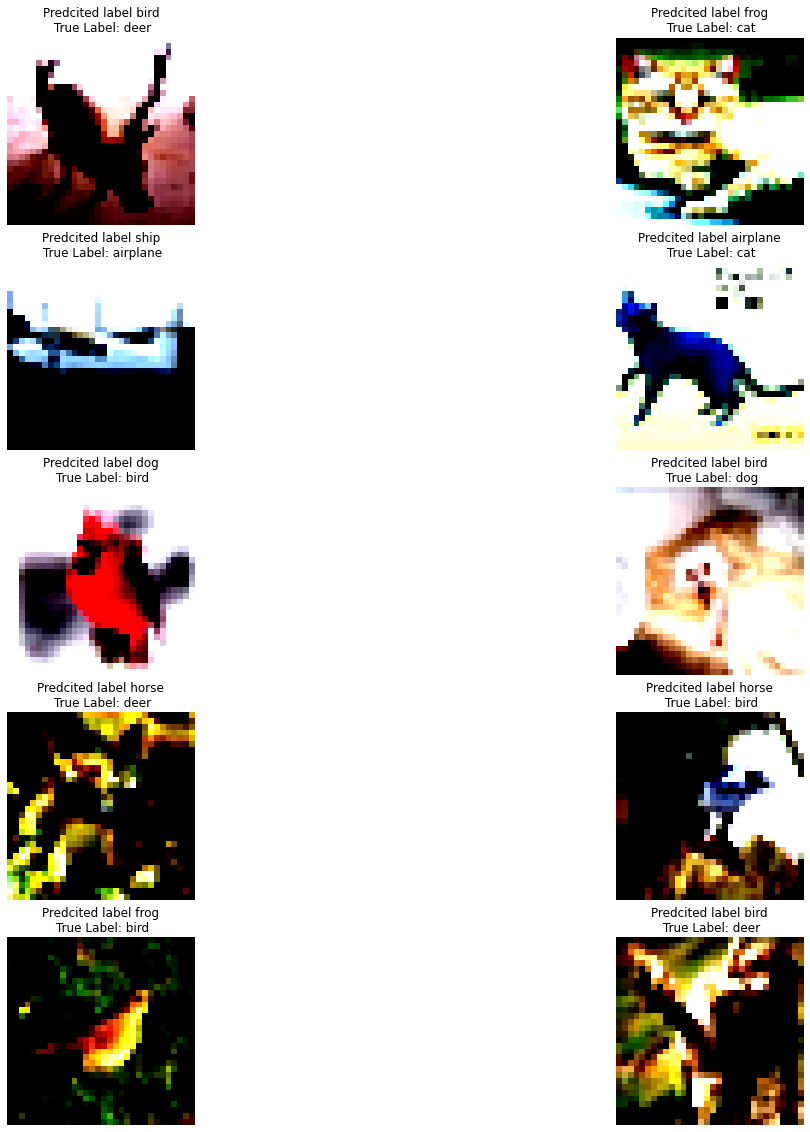

In [13]:
plot_misclassified_samples(incorrect_labels, incorrect_images, predicted_label_list)